In [146]:
import torch
from PIL import Image
import numpy as np
import torchvision
import torchvision.transforms as T
from torchvision.transforms import ToTensor, Normalize , Compose
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader


In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
# data_set = np.memmap(r'F:\Video_set\All_data_set.npy',mode='r',shape=(8991,100,100,3))
# x_np = torch.from_numpy(data_set)
# x_np.shape

In [149]:
#data_set = np.load(r'F:\Video_set\All_data_set.npy',mmap_mode="r")
data_set = np.load(r'F:\Video100.npy')
#np.random.shuffle(data_set)
#data_set = data_set.memmap.astype(float)
x_np = torch.from_numpy(data_set)
x_np.shape

torch.Size([5940, 100, 100, 3])

In [150]:
x_np.shape
x_np.type()

'torch.ByteTensor'

In [151]:
x_np[0]

tensor([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [133, 153,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [152]:
#x_img = x_np.reshape((8991,60,100,100,3))
x_img = x_np.reshape((99,60,100,100,3))

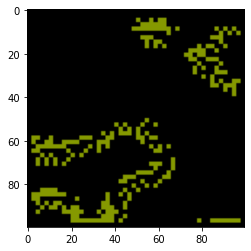

In [153]:
#x_np = x_np.permute(0,3,2,1)
a = x_np.numpy()
img = a
img.shape
plt.imshow(img[0])

In [154]:
x_img[1,2].shape


torch.Size([100, 100, 3])

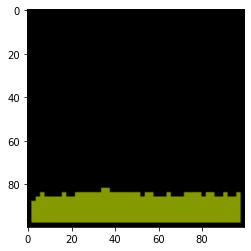

In [155]:
img = x_img[1,40]
img.shape
plt.imshow(img)

In [156]:

image_size = 100
batch_size = 1
stats = 1/255

In [157]:
x_np[0].type()

'torch.ByteTensor'

In [158]:
#x_np = x_np.memmap.astype(float)

In [159]:
# x_np = x_np.float()
# x_np = x_np/255
# x_np.shape

In [160]:
x_np = x_np.permute(0,3,1,2)
x_img = x_np.reshape((99,3,60,100,100))
x_img.shape

torch.Size([99, 3, 60, 100, 100])

In [161]:
x_img[0]

tensor([[[[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [  0,   0,   0,  ..., 133,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [  0,   0,   0,  ..., 153,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],

         ...,

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,  

In [162]:
x_np.shape

torch.Size([5940, 3, 100, 100])

In [163]:
x_img.shape

torch.Size([99, 3, 60, 100, 100])

In [19]:
x_data_set = DataLoader(x_img,batch_size,shuffle=True)

In [20]:
x_data_set

In [21]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def denorm(img_tensors):
    out = img_tensors
    return out.clamp(0,1)

In [23]:
def show_images(images, nmax=60):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach()[:nmax], nrow=10).permute(1,2,0))

def show_batch(dl, nmax=60):
    for image in dl:
        for images in image:
            images = images.reshape(60,3,100,100)
            show_images(images, nmax)
            print(images.shape)
            break
        break

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

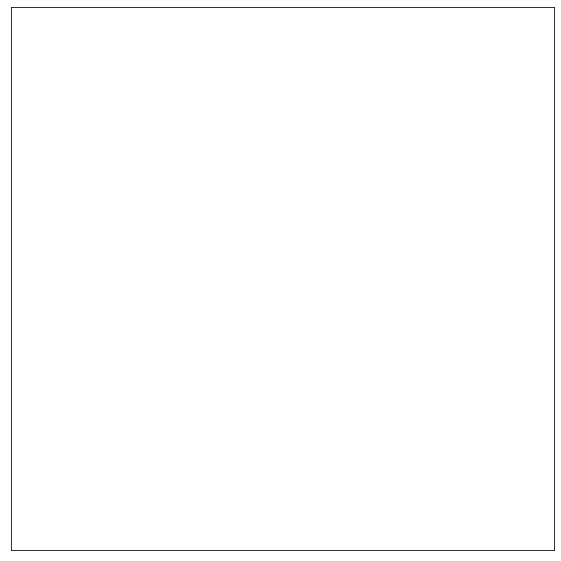

In [112]:
show_batch(x_data_set)


In [25]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [26]:
device = get_default_device()
device

device(type='cuda')

In [27]:
x_data_set = DeviceDataLoader(x_data_set, device)


In [28]:
import torch.nn as nn



In [29]:
discriminator = nn.Sequential(
    #in: 3 x 60 x 100 x 100 
    nn.Conv3d(3, 64, kernel_size=(4,5,5), stride=2, padding=1, bias=False),
    nn.BatchNorm3d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out 64 x 30 x 50 x 50
    nn.Conv3d(64, 128, kernel_size=(4,4,4), stride=2, padding=1, bias=False),
    nn.BatchNorm3d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # 128 x 25 x 25
    nn.Conv3d(128, 256, kernel_size=(3,4,4), stride=3, padding=1, bias=False),
    nn.BatchNorm3d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv3d(256, 512, kernel_size=(4,4,4), stride=3, padding=1, bias=False),
    nn.BatchNorm3d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4
    nn.Conv3d(512, 1024, kernel_size=(2,2,2), stride=3, padding=1, bias=False),
    nn.BatchNorm3d(1024),
    nn.LeakyReLU(0.2, inplace=True),
    nn.Conv3d(1024, 1, kernel_size=(1,2,2), stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1
    nn.Flatten(),
    nn.Sigmoid())
discriminator = to_device(discriminator, device)


In [30]:
# discriminator = nn.Sequential(
#     #in: 3 x 60 x 100 x 100 
#     nn.Conv3d(3, 64, kernel_size=(4,5,5), stride=2, padding=1, bias=False),
#     nn.BatchNorm3d(64),
#     nn.LeakyReLU(0.2, inplace=True),
#     # out 64 x 30 x 50 x 50
#     nn.Conv3d(64, 128, kernel_size=(4,4,4), stride=2, padding=1, bias=False),
#     nn.BatchNorm3d(128),
#     nn.LeakyReLU(0.2, inplace=True),
#     # 128 x 25 x 25
#     nn.Conv3d(128, 256, kernel_size=(3,4,4), stride=2, padding=1, bias=False),
#     nn.BatchNorm3d(256),
#     nn.LeakyReLU(0.2, inplace=True),
#     # out: 256 x 8 x 8

#     nn.Conv3d(256, 512, kernel_size=(4,4,4), stride=1, padding=1, bias=False),
#     nn.BatchNorm3d(512),
#     nn.LeakyReLU(0.2, inplace=True),
#     # out: 512 x 4 x 4

#     nn.Conv3d(512, 1, kernel_size=(4,4,4), stride=1, padding=0, bias=False),
#     # out: 1 x 1 x 1

#     nn.Flatten(),
#     nn.Sigmoid())
# discriminator = to_device(discriminator, device)


In [31]:
# discriminator = nn.Sequential(
#     nn.Conv3d(3, 128, kernel_size=(4,4,4), stride=4, padding=0, bias=False),
#     nn.BatchNorm3d(128),
#     nn.LeakyReLU(0.2, inplace=True),
    
#     nn.Conv3d(128, 512, kernel_size=(5,5,5), stride=4, padding=1, bias=False),
#     nn.BatchNorm3d(512),
#     nn.LeakyReLU(0.2, inplace=True),
#     nn.Conv3d(512, 512, kernel_size=(4,6,6), stride=1, padding=1, bias=False),
#     nn.BatchNorm3d(512),
#     nn.LeakyReLU(0.2, inplace=True),
#     # out: 512 x 4 x 4
#     nn.ConvTranspose3d(512, 60, kernel_size=(4,4,4), stride=1, padding=(0,0,0), bias=False),
#     nn.Flatten(),
#     nn.Sigmoid())

In [32]:
latent_size = 64


In [33]:
generator = nn.Sequential(
    #input 3x100x100
#     nn.Conv3d(3,64,kernel_size=(3,3,3),bias=False),
#     nn.BatchNorm2d(64),
#     nn.ReLU(True),
    
#     nn.Conv3d(64,128,kernel_size=(3,3,3),bias=False),
#     nn.BatchNorm2d(128),
#     nn.ReLU(True),
#     nn.Conv3d(128,512,kernel_size=(3,3,3),bias=False),
#     nn.BatchNorm2d(512),
#     nn.ReLU(True),
#     nn.Conv3d(3, 1, kernel_size=(1,4,4), stride=1, padding=0, bias=False),
#     nn.BatchNorm3d(1),
#     nn.LeakyReLU(0.2, inplace=True),
    
#     nn.Conv3d(128, 512, kernel_size=(1,5,5), stride=4, padding=1, bias=False),
#     nn.BatchNorm3d(512),
#     nn.LeakyReLU(0.2, inplace=True),
    nn.Conv3d(3, 512, kernel_size=(1,4,4), stride=(1,4,4), padding=1, bias=False),
    nn.BatchNorm3d(512),
    nn.LeakyReLU(0.2, inplace=True),
    nn.Conv3d(512, 60, kernel_size=(1,4,4), stride=(1,4,4), padding=1, bias=False),
    nn.BatchNorm3d(60),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4
    nn.ConvTranspose3d(60, 256, kernel_size=(5,5,5), stride=(1,2,2), padding=(2,1,1), bias=False),
    nn.BatchNorm3d(256),
    nn.ReLU(True),
    
    nn.ConvTranspose3d(256, 128, kernel_size=(4,4,4), stride=(1,2,2), padding=(1,1,1), bias=False),
    nn.BatchNorm3d(128),
    nn.ReLU(True),

    nn.ConvTranspose3d(128, 64, kernel_size=(2,4,4), stride=(1,2,2), padding=(2,1,1), bias=False),
    nn.BatchNorm3d(64),
    nn.ReLU(True),
    nn.ConvTranspose3d(64, 3, kernel_size=(3,4,4), stride=(1,2,2), padding=(2,3,3), bias=False),
    nn.Tanh()    
    
)
#xb = torch.randn(60, latent_size, 1, 1) # random latent tensors

xb = torch.unsqueeze(x_img[0],0)
fake_images = generator(xb.float())
fake_images.shape
#show_images(denorm(fake_images))
#print(fake_images.shape)

torch.Size([1, 3, 60, 100, 100])

In [34]:
xb.shape

torch.Size([1, 3, 60, 100, 100])

In [35]:
#generator = to_device(generator, device)


In [36]:
xb = torch.unsqueeze(x_img[0],0)
#xb = x_img
x_img[0].shape
fake_images = generator(xb.float())


In [37]:
xb.shape

torch.Size([1, 3, 60, 100, 100])

torch.Size([60, 3, 100, 100])


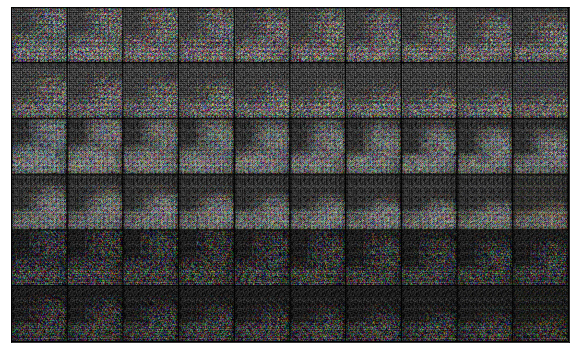

In [38]:

fake_images[0].shape
fake_images.shape
fake_images = fake_images.reshape(1,60,3,100,100)
show_images(denorm(fake_images[0]))
print(fake_images[0].shape)

In [39]:
# generator = nn.Sequential(
#     #input 3x100x100
# #     nn.Conv3d(3,64,kernel_size=(3,3,3),bias=False),
# #     nn.BatchNorm2d(64),
# #     nn.ReLU(True),
    
# #     nn.Conv3d(64,128,kernel_size=(3,3,3),bias=False),
# #     nn.BatchNorm2d(128),
# #     nn.ReLU(True),
# #     nn.Conv3d(128,512,kernel_size=(3,3,3),bias=False),
# #     nn.BatchNorm2d(512),
# #     nn.ReLU(True),
#     nn.Conv3d(3, 64, kernel_size=[2,4,4],stride=[1,1,1], padding=[3,1,1],bias=False),
#     nn.BatchNorm2d(64),
#     nn.LeakyReLU(0.2, inplace=True),
#     # out 64x 50 x 50
#     nn.Conv3d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(128),
#     nn.LeakyReLU(0.2, inplace=True),
#     # 128 x 25 x 25
#     nn.Conv3d(128, 256, kernel_size=4, stride=5, padding=1, bias=False),
#     nn.BatchNorm2d(256),
#     nn.LeakyReLU(0.2, inplace=True),
#     # out: 256 x 8 x 8
#     nn.Conv3d(256, 512, kernel_size=4, stride=1, padding=1, bias=False),
#     nn.BatchNorm2d(512),
#     nn.LeakyReLU(0.2, inplace=True),
#     # out: 512 x 4 x 4
#     nn.Conv3d(512, 60, kernel_size=4, stride=1, padding=0, bias=False),


#     nn.ConvTranspose3d(60, 256, kernel_size=(5,5,5), stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(121),
#     nn.ReLU(True),
    
#     nn.ConvTranspose3d(256, 128, kernel_size=(4,4,4), stride=2, padding=0, bias=False),
#     nn.BatchNorm2d(244),
#     nn.ReLU(True),

#     nn.ConvTranspose3d(128, 64, kernel_size=(4,4,4), stride=2, padding=0, bias=False),
#     nn.BatchNorm2d(490 ),
#     nn.ReLU(True),
#     nn.ConvTranspose3d(64, 3, kernel_size=(4,4,4), stride=2, padding=1, bias=False),
#     nn.Tanh()    
    
# )
# #xb = torch.randn(60, latent_size, 1, 1) # random latent tensors
# xb = x_img[0]
# fake_images = generator(xb.float())
# #show_images(denorm(fake_images))
# print(fake_images.shape)


In [40]:
# generator = nn.Sequential(
#     # in: latent_size x 1 x 1

#     nn.ConvTranspose2d(latent_size, 512, kernel_size=5, stride=1, padding=0, bias=False),
#     nn.BatchNorm2d(512),
#     nn.ReLU(True),
#     # out: 512 x 5 x 5

#     nn.ConvTranspose2d(512, 256, kernel_size=5, stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(256),
#     nn.ReLU(True),
    
#     nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=0, bias=False),
#     nn.BatchNorm2d(128),
#     nn.ReLU(True),

#     nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=0, bias=False),
#     nn.BatchNorm2d(64),
#     nn.ReLU(True),
#     nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
#     nn.Tanh()
# )
# xb = torch.randn(60, latent_size, 1, 1) # random latent tensors



In [41]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()
    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # Generate fake images
    #latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(torch.unsqueeze(real_images[0],0))

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [42]:
def train_generator(real_images,opt_g):
    # Clear generator gradients
    opt_g.zero_grad()
    
    # Generate fake images
#     latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
#     fake_images = generator(latent)
    fake_images = generator(torch.unsqueeze(real_images,0))
    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # Update generator weights
    loss.backward()
    opt_g.step()
    
    return loss.item()

In [43]:
from torchvision.utils import save_image


In [44]:
import os
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [45]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors.float())
    fake_images = fake_images.reshape(1,60,3,100,100)
    print(fake_images[0].shape)

    fake_images = denorm(fake_images)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(fake_images[0], os.path.join(sample_dir, fake_fname), nrow=10)
    print('Saving', fake_fname)
    if show:
        for image in fake_images:
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.set_xticks([]); ax.set_yticks([])
            fake_images.shape
            ax.imshow(make_grid(image.cpu().detach(), nrow=10).permute(1, 2, 0))
#         #ax.imshow(make_grid(denomrfake_images.cpu().detach(), nrow=6).permute(2, 1, 0))

torch.Size([60, 3, 100, 100])
Saving generated-images-0000.png


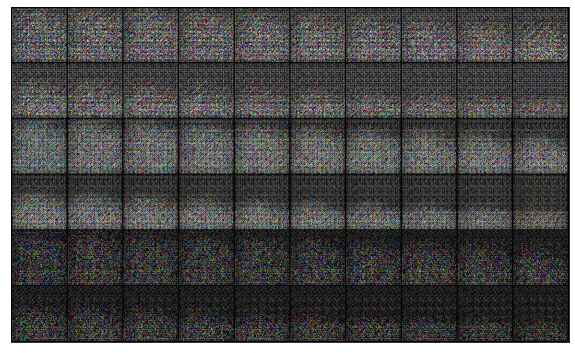

In [46]:
# fixed_latent = torch.randn(60, latent_size, 1, 1, device=device)
# save_samples(0, fixed_latent)
fake_images = torch.unsqueeze(x_img[1],0)
fake_images.shape
fake_images = fake_images.reshape(1,3,60,100,100)
generator = to_device(generator, 'cpu')
save_samples(0,fake_images)

In [47]:
generator = to_device(generator, device)

In [48]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [49]:
def fit(epochs, lr_g,lr_d, start_idx=1):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, 0.9))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, 0.9))

    for epoch in range(epochs):
        for real_images in tqdm(x_data_set):
            # Train discriminator
            real_images = real_images.float()
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(real_images[0],opt_g)
            
        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # Save generated images
        save_samples(epoch+start_idx, torch.unsqueeze(real_images[0],0), show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

In [50]:
lr_g = 0.00015
lr_d = 0.0003
epochs = 25

In [51]:
history = fit(epochs, lr_g, lr_d)


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [1/25], loss_g: 3.2686, loss_d: 0.5917, real_score: 0.8748, fake_score: 0.3674
torch.Size([60, 3, 100, 100])
Saving generated-images-0001.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [2/25], loss_g: 2.8797, loss_d: 1.6076, real_score: 0.9555, fake_score: 0.7903
torch.Size([60, 3, 100, 100])
Saving generated-images-0002.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [3/25], loss_g: 7.0163, loss_d: 0.0226, real_score: 0.9790, fake_score: 0.0014
torch.Size([60, 3, 100, 100])
Saving generated-images-0003.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [4/25], loss_g: 7.7079, loss_d: 0.6632, real_score: 0.5158, fake_score: 0.0010
torch.Size([60, 3, 100, 100])
Saving generated-images-0004.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [5/25], loss_g: 7.6247, loss_d: 0.0069, real_score: 0.9958, fake_score: 0.0026
torch.Size([60, 3, 100, 100])
Saving generated-images-0005.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [6/25], loss_g: 8.7520, loss_d: 0.0002, real_score: 0.9999, fake_score: 0.0002
torch.Size([60, 3, 100, 100])
Saving generated-images-0006.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [7/25], loss_g: 4.8527, loss_d: 0.0647, real_score: 0.9624, fake_score: 0.0260
torch.Size([60, 3, 100, 100])
Saving generated-images-0007.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [8/25], loss_g: 6.2807, loss_d: 0.0067, real_score: 0.9953, fake_score: 0.0020
torch.Size([60, 3, 100, 100])
Saving generated-images-0008.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [9/25], loss_g: 8.2647, loss_d: 0.0035, real_score: 0.9970, fake_score: 0.0006
torch.Size([60, 3, 100, 100])
Saving generated-images-0009.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [10/25], loss_g: 7.7665, loss_d: 0.7486, real_score: 0.9996, fake_score: 0.5268
torch.Size([60, 3, 100, 100])
Saving generated-images-0010.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [11/25], loss_g: 9.2816, loss_d: 3.1255, real_score: 0.0439, fake_score: 0.0001
torch.Size([60, 3, 100, 100])
Saving generated-images-0011.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [12/25], loss_g: 6.6730, loss_d: 0.0017, real_score: 0.9995, fake_score: 0.0012
torch.Size([60, 3, 100, 100])
Saving generated-images-0012.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [13/25], loss_g: 5.3748, loss_d: 0.0550, real_score: 0.9998, fake_score: 0.0533
torch.Size([60, 3, 100, 100])
Saving generated-images-0013.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [14/25], loss_g: 7.7579, loss_d: 0.0005, real_score: 0.9999, fake_score: 0.0004
torch.Size([60, 3, 100, 100])
Saving generated-images-0014.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [15/25], loss_g: 8.4004, loss_d: 0.0004, real_score: 1.0000, fake_score: 0.0004
torch.Size([60, 3, 100, 100])
Saving generated-images-0015.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [16/25], loss_g: 9.4541, loss_d: 0.0123, real_score: 0.9878, fake_score: 0.0001
torch.Size([60, 3, 100, 100])
Saving generated-images-0016.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [17/25], loss_g: 8.5957, loss_d: 3.2691, real_score: 0.9999, fake_score: 0.9620
torch.Size([60, 3, 100, 100])
Saving generated-images-0017.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [18/25], loss_g: 7.4179, loss_d: 0.0010, real_score: 0.9995, fake_score: 0.0005
torch.Size([60, 3, 100, 100])
Saving generated-images-0018.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [19/25], loss_g: 7.1280, loss_d: 0.0013, real_score: 0.9996, fake_score: 0.0009
torch.Size([60, 3, 100, 100])
Saving generated-images-0019.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [20/25], loss_g: 8.0683, loss_d: 0.0014, real_score: 0.9990, fake_score: 0.0003
torch.Size([60, 3, 100, 100])
Saving generated-images-0020.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [21/25], loss_g: 8.9619, loss_d: 0.0007, real_score: 0.9995, fake_score: 0.0001
torch.Size([60, 3, 100, 100])
Saving generated-images-0021.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [22/25], loss_g: 5.1336, loss_d: 0.0077, real_score: 0.9998, fake_score: 0.0075
torch.Size([60, 3, 100, 100])
Saving generated-images-0022.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [23/25], loss_g: 1.0659, loss_d: 0.5841, real_score: 0.5584, fake_score: 0.0015
torch.Size([60, 3, 100, 100])
Saving generated-images-0023.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [24/25], loss_g: 7.4477, loss_d: 4.6051, real_score: 0.0100, fake_score: 0.0002
torch.Size([60, 3, 100, 100])
Saving generated-images-0024.png


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [25/25], loss_g: 6.8283, loss_d: 0.0013, real_score: 0.9998, fake_score: 0.0011
torch.Size([60, 3, 100, 100])
Saving generated-images-0025.png


In [52]:
generator = to_device(generator,'cpu')

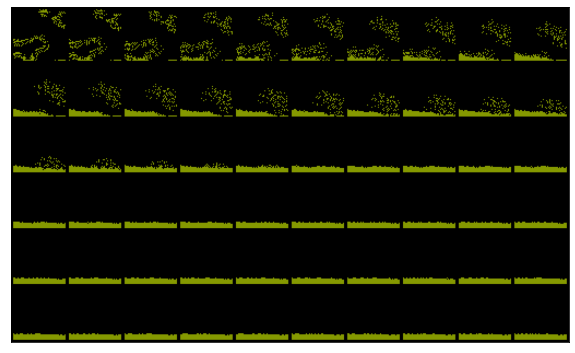

In [164]:
x_img = x_img.reshape(99,60,3,100,100)
#fake_images[20].shape
show_images(x_img[0])
#x_img[0].shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


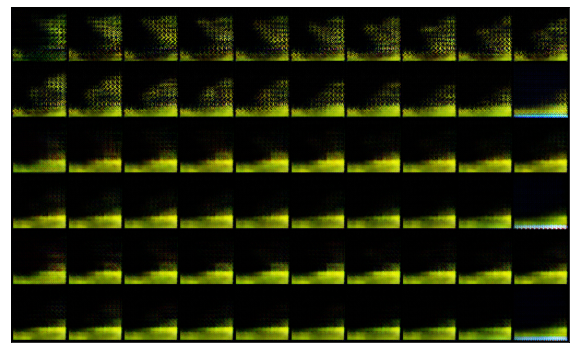

In [165]:
x_img = x_img.reshape(99,3,60,100,100)
X_T = torch.unsqueeze(x_img[4],0)
#X_T = torch.rand(1,3,60,100,100)
fake_images = generator(X_T.float())
fake_images = fake_images.reshape(1,60,3,100,100)
show_images(fake_images[0])

#print(fake_images.shape)

In [55]:
losses_g, losses_d, real_scores, fake_scores = history


In [56]:
fake_scores

[0.36744749546051025,
 0.7903019785881042,
 0.001436902559362352,
 0.0010461240308359265,
 0.002628596965223551,
 0.0001589901075931266,
 0.025974247604608536,
 0.001976264175027609,
 0.0005766147514805198,
 0.5267634391784668,
 6.36026234133169e-05,
 0.001212695729918778,
 0.05329879745841026,
 0.00040107095264829695,
 0.0003971364349126816,
 5.1913193601649255e-05,
 0.9619525074958801,
 0.0004676584794651717,
 0.0008883693953976035,
 0.00032232861849479377,
 0.00013281239080242813,
 0.007489452138543129,
 0.0015058682765811682,
 0.00021762741380371153,
 0.0011356484610587358]

In [57]:
# # Save the model checkpoints 
# torch.save(generator.state_dict(), 'generated/G.pth')
# torch.save(discriminator.state_dict(), 'generated/D.pth')

In [58]:
torch.save(generator, 'generated/G.pth')
torch.save(discriminator, 'generated/D.pth')

In [59]:
    torch.cuda.empty_cache()


In [109]:
generator = torch.load(PATH)
discriminator = torch.load(PATH)

NameError: name 'PATH' is not defined

In [116]:
fake_images.shape

torch.Size([1, 60, 100, 3, 100])

In [168]:
fake_images = fake_images.permute(0,1,4,2,3)
fake_images.shape

torch.Size([1, 60, 100, 100, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


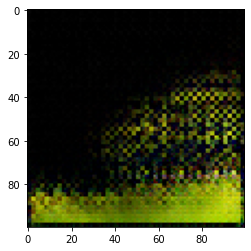

In [176]:
plt.imshow(fake_images[0,12].detach().numpy())

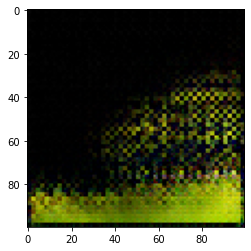

In [177]:
plt.imshow(denorm(fake_images[0,12]).detach().numpy())
